In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
from google.colab import drive
drive.mount('/content/drive')
train_data_dir = '/content/drive/MyDrive/17Flower/train'
test_data_dir = '/content/drive/MyDrive/17Flower/test'

Mounted at /content/drive


In [5]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=.1)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    class_mode='categorical',
    shuffle = True,
    subset='validation')

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(17, activation='softmax')])

In [7]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
early_stop = EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1)

In [9]:
epochs = 35

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[early_stop],
    validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 714s 25s/step - accuracy: 0.0701 - loss: 2.9183 - val_accuracy: 0.1474 - val_loss: 2.5238
Epoch 2/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.1722 - loss: 2.5216 - val_accuracy: 0.3684 - val_loss: 2.0091
Epoch 3/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2662 - loss: 2.1594 - val_accuracy: 0.4632 - val_loss: 1.5773
Epoch 4/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.3993 - loss: 1.8362 - val_accuracy: 0.5684 - val_loss: 1.2900
Epoch 5/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5087 - loss: 1.4933 - val_accuracy: 0.5895 - val_loss: 1.1624
Epoch 6/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5189 - loss: 1.4315 - val_accuracy: 0.5895 - val_loss: 1.0831
Epoch 7/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5866 - loss: 1.2667 - val_accuracy: 0.6316 - val_loss: 1.0365
Epoch 8/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5797 - loss: 1.2795 - val_accuracy: 0.6421 - val_los

Found 340 images belonging to 17 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step


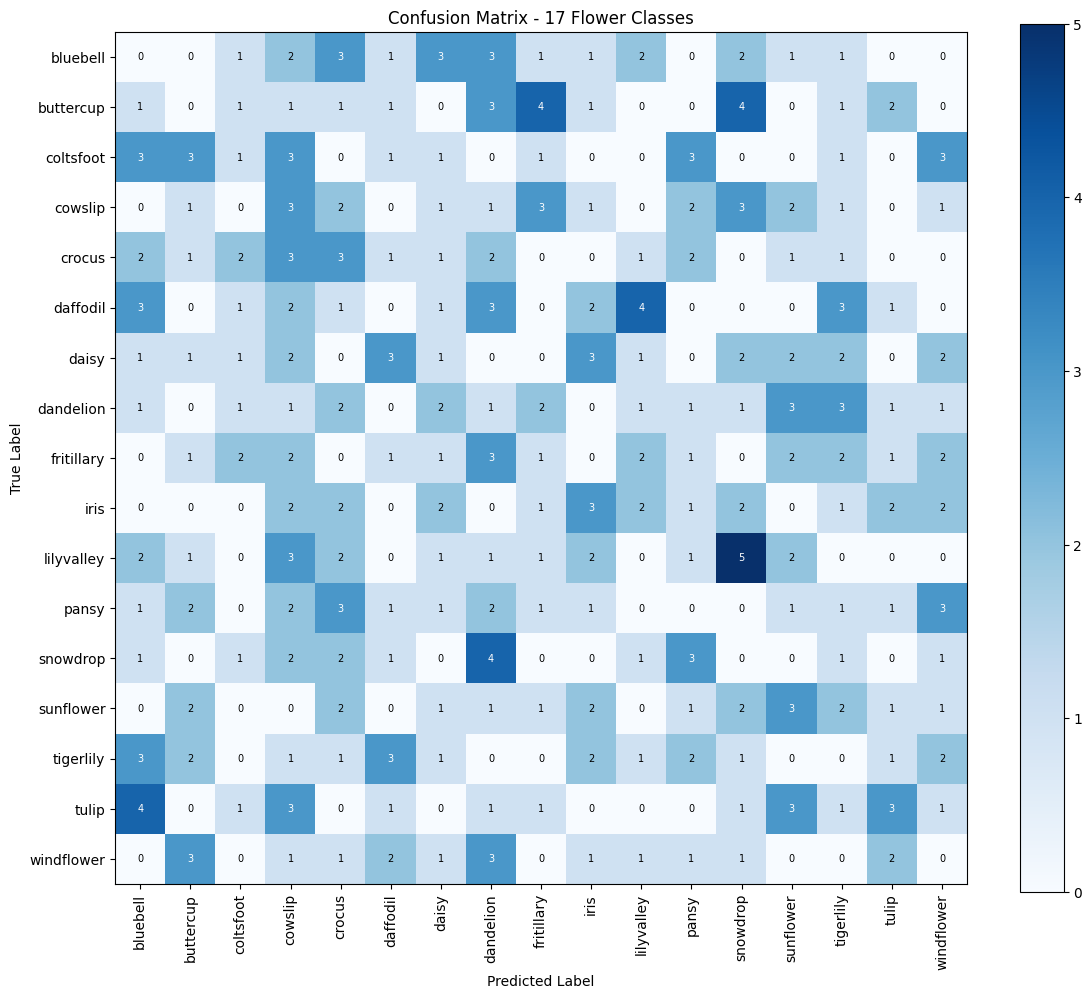

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dataset = test_datagen.flow_from_directory(
    test_data_dir,
    class_mode = 'categorical',
    shuffle = True)

label_flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
                'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

preds = model.predict(test_dataset, verbose=1)

Y_pred = np.argmax(preds, axis=1)
Y_true = test_dataset.classes

cm = confusion_matrix(Y_true, Y_pred)

plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - 17 Flower Classes')
plt.colorbar()

tick_marks = np.arange(len(label_flowers))
plt.xticks(tick_marks, label_flowers, rotation=90)
plt.yticks(tick_marks, label_flowers)

thresh = cm.max() / 2.
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=7)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

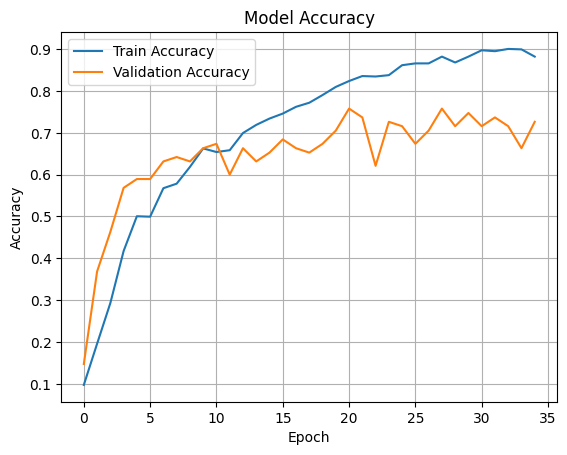

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

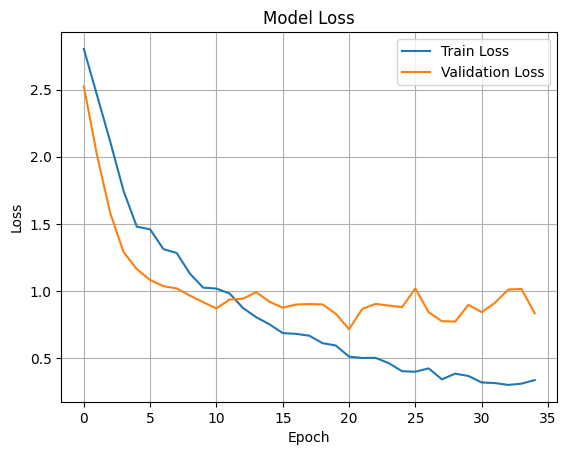

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


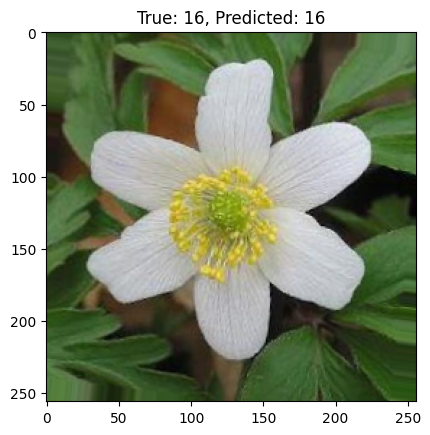

In [ ]:
x_val, y_val = next(validation_generator)

index = np.random.randint(0, len(x_val))
image = x_val[index]
true_label = np.argmax(y_val[index])

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(image)
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()

In [19]:
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Val Loss:", history.history['val_loss'][-1])
print("Val Accuracy:", history.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Train Loss: 0.33767008781433105
Train Accuracy: 0.8821621537208557
Val Loss: 0.8343876600265503
Val Accuracy: 0.7263157963752747
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.6785 - loss: 1.3013
Test Loss: 1.2026407718658447
Test Accuracy: 0.6970587968826294
